In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [7]:
fit_stars_path = '/Users/mschmitz/jbonnin/Data/CFIS_PSF/CCD-2_dataset/train-star_selection-0000009-2.fits'
test_stars_path = '/Users/mschmitz/jbonnin/Data/CFIS_PSF/CCD-2_dataset/test-star_selection-0000009-2.fits'
PSFs_path = '/Users/mschmitz/jbonnin/Data/rca_runs/w3/shapepipe_run_2019-12-05_11-18-01/rca_runner/output/test_psf-0000009-2.npy'

fit_starcat = fits.open(fit_stars_path)

test_starcat = fits.open(test_stars_path)
test_stars = test_starcat[2].data['VIGNET']

PSFs = np.load(PSFs_path)

x_fit = fit_starcat[2].data['XWIN_IMAGE']
y_fit = fit_starcat[2].data['YWIN_IMAGE']

x_test = test_starcat[2].data['XWIN_IMAGE']
y_test = test_starcat[2].data['YWIN_IMAGE']

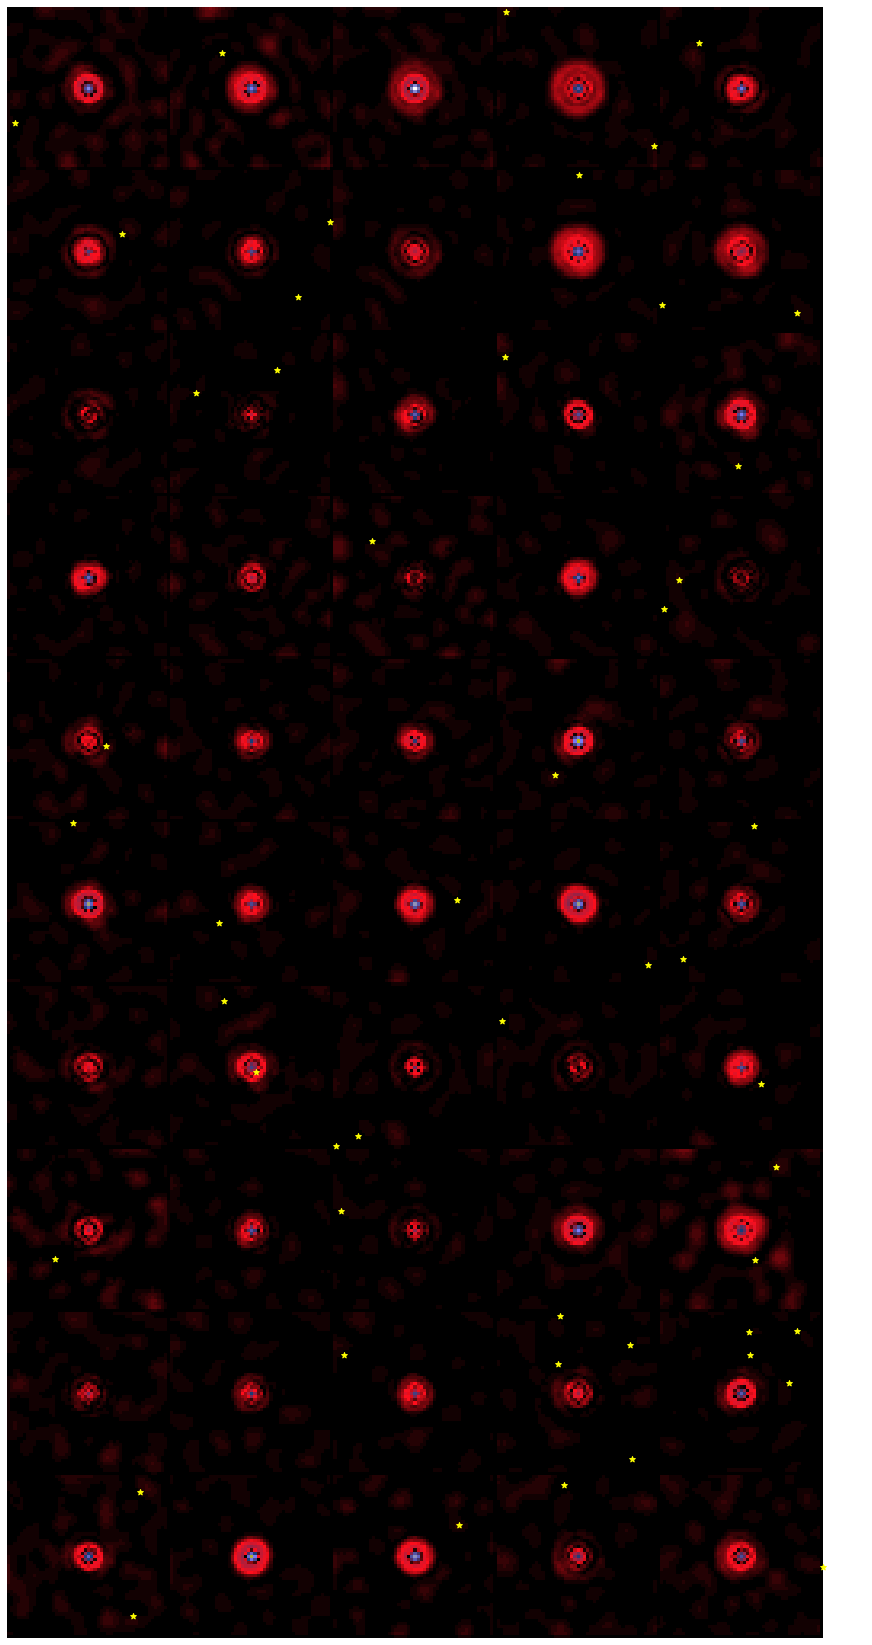

In [13]:
res = np.abs(test_stars - PSFs)
ccd_res = np.zeros((10*res.shape[1], 5*res.shape[2]))

for k in range(50):
    ccd_res[res.shape[1]*(9-k%10):res.shape[1]*(10-k%10),res.shape[2]*(k//10):res.shape[2]*(k//10+1)] = res[k]

plt.figure(figsize = (30,30))
plt.imshow(ccd_res, cmap='gist_stern')
plt.axis('off')

plt.scatter(x_fit / 2048 * 255, 509 - y_fit / 4612 * 510, marker = '*', c = 'yellow')

plt.show()